In [1]:
# importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


In [2]:
df=pd.read_csv('spam_ham_dataset.csv', encoding = 'latin-1')

In [3]:
df.columns = ['text', 'label_num']
df = df[['text', 'label_num']]

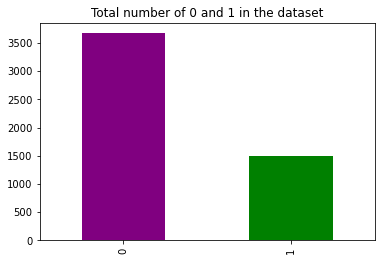

In [4]:
df['label_num'].value_counts().plot.bar(color = ["purple","green"])
plt.title('Total number of 0 and 1 in the dataset')
plt.show()

In [5]:
df['label_num'].value_counts()

0    3672
1    1499
Name: label_num, dtype: int64

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df['label_num'].value_counts()

0    3531
1    1462
Name: label_num, dtype: int64

In [8]:
df.isnull().sum()

text         0
label_num    0
dtype: int64

In [9]:
x= df.text.values
y=df.label_num.values

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [11]:
cv=CountVectorizer(stop_words='english',  strip_accents='unicode', max_features=1000)

In [12]:
x_train=cv.fit_transform(x_train)
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 3, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [13]:
x_test=cv.fit_transform(x_test)

In [14]:
x_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
model=MultinomialNB()

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)
x_train = cv.fit_transform(x_train)
x_test = cv.transform(x_test)
model.fit(x_train,y_train)

MultinomialNB()

In [17]:
y_pred = model.predict(x_test)

In [18]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm

array([[656,  48],
       [ 16, 279]], dtype=int64)

In [19]:
score = model.score(x_train,y_train)
score

0.9351527290936404

Text(33.0, 0.5, 'True')

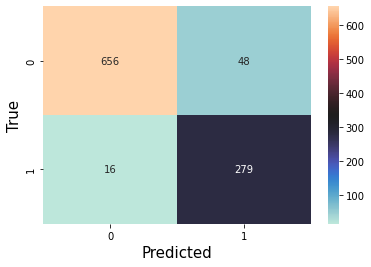

In [20]:
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'd',cmap="icefire")
ax.set_xlabel('Predicted', fontsize=15)
ax.set_ylabel('True', fontsize=15)